In [1]:
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("ufal/robeczech-base", num_labels=4)

/home/kydliceh/Projects/Bakalarka-code/myvenv/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at ufal/robeczech-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model t

In [3]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(51961, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
lm_head.decoder = None

In [25]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:


from datamodules import NewsDataModuleForLM
dm = NewsDataModuleForLM(cache_dir="cache", batch_size=2, limit=1000, tokenizer="ufal/robeczech-base")

In [2]:
dm.prepare_data()

In [12]:
dm.batch_size = 2
dm.setup()

In [13]:
dm.mlm = 0.15

ld = dm.train_dataloader()

In [17]:
z = next(iter(ld))

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [18]:
z["labels"]

tensor([[-100, -100, -100,  ..., -100, -100, -100],
        [2590, -100, -100,  ..., -100, -100, -100]])

In [41]:
from functools import partial
from optims import get_no_bias_weight_adamw
from schedulers import get_linear_schedule_warmup
part_optim = partial(get_no_bias_weight_adamw, lr=1e-5, weight_decay=0.01, betas=(0.9, 0.999), eps=1e-6)
part_sched = partial(get_linear_schedule_warmup, num_warmup_steps=0)



In [66]:
from models import LLMModel
model = LLMModel("ufal/robeczech-base", part_optim, None)

In [47]:
out = model(**z)

In [59]:
import lightning.pytorch as pl
trainer = pl.Trainer(accelerator="cpu", devices=1)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [67]:
trainer.fit(model, datamodule=dm)


  | Name    | Type               | Params
-----------------------------------------------
0 | model   | RobertaForMaskedLM | 126 M 
1 | metrics | ModuleDict         | 0     
-----------------------------------------------
126 M     Trainable params
0         Non-trainable params
126 M     Total params
504.007   Total estimated model params size (MB)


You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch 0:   0%|          | 0/1076 [00:00<?, ?it/s] 

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch 0:   0%|          | 1/1076 [00:08<2:31:27,  8.45s/it, loss=nan, v_num=3]

/home/kydliceh/Projects/Bakalarka-code/myvenv/lib64/python3.10/site-packages/lightning/pytorch/loops/optimization/optimizer_loop.py:138: UserWarning: `training_step` returned `None`. If this was on purpose, ignore this warning...
  self.warning_cache.warn("`training_step` returned `None`. If this was on purpose, ignore this warning...")


Epoch 0:   1%|          | 6/1076 [00:59<2:55:32,  9.84s/it, loss=nan, v_num=3]

In [1]:
from lightning.pytorch.callbacks import Callback
from torchmetrics import Accuracy, F1Score, Precision, Recall, ConfusionMatrix, Metric
from dataclasses import dataclass


@dataclass
class MetricStruct:
    readable_name: str
    metric: Metric
    step: bool
    epoch: bool


class TrainMetricCallback(Callback):
    def __init__(self, metric: MetricStruct):
        super().__init__()
        self.metric = metric


    def on_train_epoch_end(self, trainer, pl_module) -> None:
        if self.metric.epoch:
            epoch_value = self.metric.metric.compute()
            trainer.logger.log_metrics({f"train/{self.metric.readable_name}": epoch_value}, step=trainer.global_step)
        self.metric.metric.reset()
        



    def on_train_batch_end(self, trainer, pl_module, outputs, batch, batch_idx) -> None:
        labels = batch['labels']
        if not isinstance(outputs, dict) or 'logits' not in outputs:
            raise ValueError('The `outputs` should be a dict with key `logits`.')
        preds = outputs['logits'].argmax(dim=1)
        if self.metric.step:
            step_value = self.metric.metric(preds, labels)
            trainer.logger.log_metrics({f"train/{self.metric.readable_name}": step_value}, step=trainer.global_step)
        if self.metric.epoch:
            self.metric.metric.update(preds, labels)



In [2]:
from lightning.pytorch.callbacks import BaseFinetuning

class SimpleLayersFreezer(BaseFinetuning):
    def __init__(self, last_unfreeze_layers: int):
        super().__init__()
        self.last_unfreeze_layers = last_unfreeze_layers

    def finetune_function(
        self, pl_module: "pl.LightningModule", epoch: int, optimizer, opt_idx: int
    ):
        pass

    def freeze_before_training(self, model):
        self.freeze(model)
        # Classifier unfreeze
        if hasattr(model.pretrained_model, "classifier"):
            self.make_trainable(model.pretrained_model.classifier)
        # Last freeze_layers layers unfreeze
        if hasattr(model.pretrained_model, 'roberta') and hasattr(model.pretrained_model.roberta, 'encoder'):
            self.make_trainable(model.pretrained_model.roberta.encoder.layer[-self.last_unfreeze_layers:])

In [3]:
from dataclasses import dataclass
from typing import List
from lightning import LightningModule 
import torch
from lightning.pytorch.loggers import WandbLogger
from transformers import AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from transformers.modeling_outputs import SequenceClassifierOutput
from torchmetrics import Accuracy, F1Score, Precision, Recall, ConfusionMatrix, Metric
from torchmetrics.classification import MulticlassConfusionMatrix


@dataclass
class MetricStruct:
    readable_name: str
    metric: Metric
    step: bool
    epoch: bool
    

def prepare_confussion_matrix_for_logging(confusion_matrix, class_names):
    data = []
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            data.append((
                class_names[i],
                class_names[j],
                confusion_matrix[i, j]
            ))
    return data, ["Actual", "Predicted", "Count"]

class FineTunedRobeCzech(LightningModule):
    def __init__(self, model_chp, class_names, train_metrics: List[MetricStruct], val_metrics: List[MetricStruct], test_metrics: List[MetricStruct], lr=2e-5, warmup_steps=1000, betas=(0.9, 0.98), eps=1e-08, weight_decay=0.0):
        super().__init__()
        self.save_hyperparameters()
        self.pretrained_model = self.get_model(model_chp, len(class_names))
        self.metrics = {
            "train": train_metrics,
            "val": val_metrics,
            "test": test_metrics
        }

    def get_model(self, model_chp, num_dim):
        model = AutoModelForSequenceClassification.from_pretrained(model_chp, num_labels=num_dim)
        return model


    def log_metrics(self, output: SequenceClassifierOutput, labels, split):
        predicted_labels = torch.argmax(output.logits, dim=1)
        self.log(f"{split}/loss", output.loss, logger=True, on_step=True, on_epoch=True, prog_bar=True)
        for metric_struct in self.metrics[split]:
            if metric_struct.step:
                step_value = metric_struct.metric(predicted_labels, labels)
                self.log(f"{split}/{metric_struct.readable_name}_step", step_value, logger=True)
            else:
                metric_struct.metric.update(predicted_labels, labels)

    def log_confussion_matrix(self, cfs_matrix, split):
        if not isinstance(self.logger, WandbLogger):
            raise Exception("Confusion matrix logging is only supported for wandb logger")
        data, cols = prepare_confussion_matrix_for_logging(cfs_matrix, self.hparams.class_names)
        self.logger.log_table(f"{split}/confusion_matrix_{self.current_epoch}", data=data, columns=cols)


    def reset_and_log_metrics(self, split):
        for metric_struct in self.metrics[split]:
            if metric_struct.epoch:
                if isinstance(metric_struct.metric, MulticlassConfusionMatrix):
                    cm = metric_struct.metric.compute()
                    self.log_confussion_matrix(cm, split)
                else:
                    self.log(f"{split}/{metric_struct.readable_name}_epoch", metric_struct.metric.compute(), logger=True)
            metric_struct.metric.reset()

    def training_step(self, batch, batch_idx):
        output = self.pretrained_model(**batch)
        self.log_metrics(output, batch["labels"], "train")
        return output.loss

    def training_epoch_end(self, outputs):
        self.reset_and_log_metrics("train")

    def validation_step(self, batch, batch_idx):
        output = self.pretrained_model(**batch)
        labels = batch["labels"]
        self.log_metrics(output, labels, "val")
        return output.loss

    def validation_epoch_end(self, outputs):
        self.reset_and_log_metrics("val")
    
    def test_step(self, batch, batch_idx):
        output = self.pretrained_model(**batch)
        labels = batch["labels"]
        self.log_metrics(output, labels ,"test")
        return output.loss

    def test_epoch_end(self, outputs):
        self.reset_and_log_metrics("test")


    def configure_optimizers(self):
        scheduler = None
        # Use hugging face settings
        no_decay = ["bias", "LayerNorm.weight"]
        optimizer_grouped_parameters = [
            {
                "params": [p for n, p in self.pretrained_model.named_parameters() if not any(nd in n for nd in no_decay)],
                "weight_decay": self.hparams.weight_decay,
            },
            {
                "params": [p for n, p in self.pretrained_model.named_parameters() if any(nd in n for nd in no_decay)],
                "weight_decay": 0.0,
            },
        ]
        optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=self.hparams.lr, eps=self.hparams.eps, betas=self.hparams.betas )

        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=self.hparams.warmup_steps,
            num_training_steps=self.trainer.estimated_stepping_batches,
        )
        scheduler = {"scheduler": scheduler, "interval": "step", "frequency": 1}
        return [optimizer], [scheduler]

In [4]:
from transformers import PreTrainedTokenizerBase, AutoTokenizer, DataCollatorWithPadding
from torch.utils.data import DataLoader
from datasets import load_dataset, load_from_disk
from pathlib import Path
from lightning.pytorch import LightningDataModule
import shutil

class NewsDataModule(LightningDataModule):
    def __init__(self, column, tokenizer, max_length=512, batch_size=12, num_proc=4, trunc_type="start", cache_dir=Path("cache/czech_news_proc"), reload_cache=False):
        super().__init__()
        self.batch_size = batch_size
        self.num_proc = num_proc
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer, use_fast=True)
        self.max_length = max_length
        self.column = column
        self.trunc_type = trunc_type
        self.data_collator = DataCollatorWithPadding(tokenizer=self.tokenizer, padding=True)
        self.cache_dir = cache_dir
        self.reload_cache = reload_cache

        

    def prepare_split(self, split, reload_cache):
        print(f"Preparing {split} split")
        split_cache_dir = self.cache_dir / str(self.max_length) / split
        if split_cache_dir.exists():
            if not reload_cache:
                return
            else:
                shutil.rmtree(split_cache_dir)
                split_cache_dir.mkdir(parents=True, exist_ok=True)

        dataset = load_dataset(str("hynky/czech_news_dataset"), split=split)
        dataset = dataset.rename_column(self.column, "labels")
        cols = {"labels", "attention_mask", "input_ids"}
        dataset = dataset.map(lambda batch: self.tokenizer(batch["content"], truncation=True, max_length=self.max_length), keep_in_memory=True, batched=True)
        # Remove "Nones"
        dataset = dataset.map(
            lambda batch: {"labels": [x - 1 for x in batch["labels"] if x != 0]}, batched=True, num_proc=self.num_proc,
            keep_in_memory=True,
        )
        dataset = dataset.remove_columns(set(dataset.column_names) - cols)
        dataset.set_format("pt", columns=["input_ids", "attention_mask", "labels"])

        print("Saving")
        dataset.save_to_disk(str(split_cache_dir), num_proc=self.num_proc)

    def load_split(self, split):
        return load_from_disk(self.cache_dir / str(self.max_length) / split)

    def prepare_data(self):
        self.prepare_split("train", reload_cache=self.reload_cache)
        self.prepare_split("validation", reload_cache=self.reload_cache)
        self.prepare_split("test", reload_cache=self.reload_cache)
    
    def setup(self, stage=None):
        if stage == 'fit' or stage is None:
            self.train_dataset = self.load_split("train")
            self.val_dataset = self.load_split("validation")
        if stage == 'test' or stage is None:
            self.test_dataset = self.load_split("test")
            

    def create_dataloader(self, dataset):
        return DataLoader(dataset, batch_size=self.batch_size, num_workers=self.num_proc, collate_fn=self.data_collator, shuffle=True)


    def train_dataloader(self):
        return self.create_dataloader(self.train_dataset)

    def val_dataloader(self):
        return self.create_dataloader(self.val_dataset)

    def test_dataloader(self):
        return self.create_dataloader(self.test_dataset)

data_module = NewsDataModule("server", "ufal/robeczech-base", reload_cache=False)
data_module.prepare_data()
data_module.setup()

Preparing train split
Preparing validation split
Preparing test split


In [13]:
from lightning.pytorch.callbacks import DeviceStatsMonitor, LearningRateMonitor, ModelCheckpoint, Timer, EarlyStopping
from lightning.pytorch.loggers.wandb import WandbLogger
from lightning.pytorch import Trainer

column = "server"
logger = WandbLogger(project=f"{column}_NN",log_model=True)
class_names = data_module.train_dataset.features["labels"].names[1:]

train_metrics, test_metrics, val_metrics =[[
    MetricStruct("accuracy", Accuracy(task="multiclass", num_classes=len(class_names)), step=False, epoch=True),
    MetricStruct("f1_macro", F1Score(task="multiclass", num_classes=len(class_names), average="macro"), step=True, epoch=True),
    MetricStruct("f1_micro",  F1Score(task="multiclass", num_classes=len(class_names), average="micro"), step=True, epoch=True),
    MetricStruct("precission", Precision(task="multiclass", num_classes=len(class_names), average="macro"), step=False, epoch=True),
    MetricStruct("recall", Recall(task="multiclass", num_classes=len(class_names), average="macro"), step=False, epoch=True),
    MetricStruct("confusion_matrix", ConfusionMatrix(task="multiclass", num_classes=len(class_names)), step=False, epoch=True),
] for _ in range(3)]

model = FineTunedRobeCzech("ufal/robeczech-base", class_names, train_metrics=train_metrics, test_metrics=test_metrics, val_metrics=val_metrics)




trainer = Trainer(

    max_epochs=4,
    accelerator="gpu",
    devices=1,
    callbacks=[
        SimpleLayersFreezer(2),
        LearningRateMonitor(logging_interval="step"),
        EarlyStopping(monitor="val/loss", patience=3, mode="min"),
        ModelCheckpoint(monitor="val/loss", save_top_k=5, mode="min"),
        Timer(),
    ],
    enable_model_summary=True,
    enable_progress_bar=True,
    logger=logger,
    limit_train_batches=1,
    limit_val_batches=1,
    limit_test_batches=1,
    log_every_n_steps=1,
    val_check_interval=1,
)

#trainer.fit(model, datamodule=data_module)
# trainer.test(model, datamodule=data_module)

Some weights of the model checkpoint at ufal/robeczech-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at ufal/robeczech-base and are newly initialized: 

In [ ]:
torch.cuda.is_available()

In [12]:
from lightning.pytorch.tuner.tuning import Tuner

tuner = Tuner(trainer)
tuner.lr_find(model, datamodule=data_module)

Preparing train split
Preparing validation split
Preparing test split


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│   1 from lightning.pytorch.tuner.tuning import Tuner                                             │
│   2                                                                                              │
│   3 tuner = Tuner(trainer)                                                                       │
│ ❱ 4 tuner.lr_find(model, datamodule=data_module)                                                 │
│   5                                                                                              │
│                                                                                                  │
│ /lnet/aic/personal/kydliceh/non_runable/NLP_venv/lib/python3.10/site-packages/lightning/pytorch/ │
│ tuner/tuning.py:267 in lr_find                                                                   │
│                                                                                                  │
│   264 │   │   lr_finder_callback._early_exit = True                                              │
│   265 │   │   self.trainer.callbacks = [lr_finder_callback] + self.trainer.callbacks             │
│   266 │   │                                                                                      │
│ ❱ 267 │   │   self.trainer.fit(model, train_dataloaders, val_dataloaders, datamodule)            │
│   268 │   │                                                                                      │
│   269 │   │   self.trainer.callbacks = [cb for cb in self.trainer.callbacks if cb is not lr_fi   │
│   270                                                                                            │
│                                                                                                  │
│ /lnet/aic/personal/kydliceh/non_runable/NLP_venv/lib/python3.10/site-packages/lightning/pytorch/ │
│ trainer/trainer.py:608 in fit                                                                    │
│                                                                                                  │
│    605 │   │   """                                                                               │
│    606 │   │   model = self._maybe_unwrap_optimized(model)                                       │
│    607 │   │   self.strategy._lightning_module = model                                           │
│ ❱  608 │   │   call._call_and_handle_interrupt(                                                  │
│    609 │   │   │   self, self._fit_impl, model, train_dataloaders, val_dataloaders, datamodule,  │
│    610 │   │   )                                                                                 │
│    611                                                                                           │
│                                                                                                  │
│ /lnet/aic/personal/kydliceh/non_runable/NLP_venv/lib/python3.10/site-packages/lightning/pytorch/ │
│ trainer/call.py:38 in _call_and_handle_interrupt                                                 │
│                                                                                                  │
│   35 │   │   if trainer.strategy.launcher is not None:                                           │
│   36 │   │   │   return trainer.strategy.launcher.launch(trainer_fn, *args, trainer=trainer,     │
│   37 │   │   else:                                                                               │
│ ❱ 38 │   │   │   return trainer_fn(*args, **kwargs)                                              │
│   39 │                                                                                           │
│   40 │   except _TunerExitException:                       

In [80]:
sch = get_linear_schedule_with_warmup(None, 100, 1000, min_lr_ratio=0.1)

In [79]:
def get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, min_lr_ratio:float, last_epoch=-1):
    def lr_lambda(current_step: int):
        if current_step < num_warmup_steps:
            return (1-min_lr_ratio) / num_warmup_steps * float(current_step) + min_lr_ratio
        return max(
            min_lr_ratio, float(num_training_steps - current_step) / float(max(1, num_training_steps - num_warmup_steps)) * (1-min_lr_ratio) + min_lr_ratio
        )

    return lr_lambda


In [78]:
sch(910)

0.9820000000000001

In [37]:
max_lr = 50

In [82]:
import numpy as np
x = np.arange(0, 1000)
y = [sch(i) for i in x]

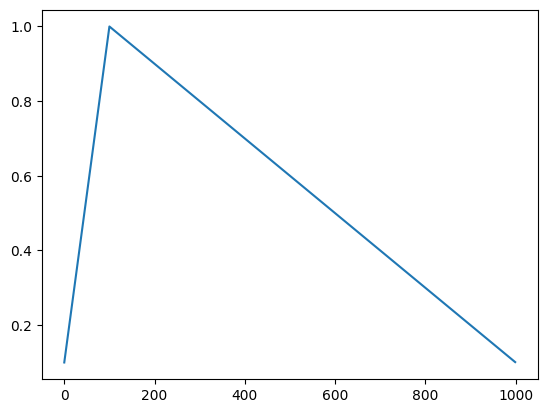

In [83]:
#plot 
import matplotlib.pyplot as plt
plt.plot(x, y)